## Using 2014/15 Westpond data to predict 2013

### Train Features
1. land surface temp (wp_LST.day)
2. sensible heat flux (wp_le)
3. latent heat flux (wp_h)
4. net radiation (net_rad)
5. avg air temp (avg_air_temp)

In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import exp
import regression as r
import numpy as np

In [2]:
df = exp.get_exp1_data()
df.head()

,avg_air_temp,avg_soil_temp,doy,net_rad,year,wp_ch4_gf,wp_co2_gf,wp_er,wp_gpp,wp_h,...,mb_bnd2,mb_bnd3,mb_bnd7,mb_evi,mb_lswi,mb_ndvi,wp_LST.day,wp_LST.night,mb_LST.day,mb_LST.night
0,19.2,22.3,195,190.0,2012,4332.368657,-304.542172,145.072376,-449.614548,1447.549899,...,0.187575,0.025212,0.053137,0.298162,0.562370,0.6491,29.61,17.2850,26.3350,18.6450
1,19.3,21.8,196,189.0,2012,5305.896768,-335.648791,150.278671,-485.927462,1921.833137,...,0.186562,0.024569,0.051306,0.296544,0.574074,0.6504,29.63,17.2325,26.4075,18.5925
2,20.3,21.9,197,187.0,2012,6215.371936,-313.150966,158.307017,-471.457982,1176.374322,...,0.185550,0.023925,0.049475,0.294925,0.585779,0.6517,29.65,17.1800,26.4800,18.5400
3,16.8,22.4,198,186.0,2012,7129.353337,-339.900067,153.561669,-493.461736,2575.636175,...,0.184537,0.023281,0.047644,0.293306,0.597483,0.6530,29.67,17.1275,26.5525,18.4875
4,17.0,21.5,199,151.0,2012,7070.768573,-319.771564,144.053480,-463.825044,1916.081260,...,0.183525,0.022638,0.045812,0.291687,0.609188,0.6543,29.69,17.0750,26.6250,18.4350


In [3]:
X_cols, Y_cols = ["wp_LST.day", "wp_h", "wp_le", "net_rad", "avg_air_temp"], ["wp_ch4_gf"]
train_years, test_years = [2013], [2014, 2015]
X_train, Y_train = exp.featurize(df, X_cols, Y_cols, years=train_years)
X_test, Y_test = exp.featurize(df, X_cols, Y_cols, years=test_years)

R2-score:  0.190854676648


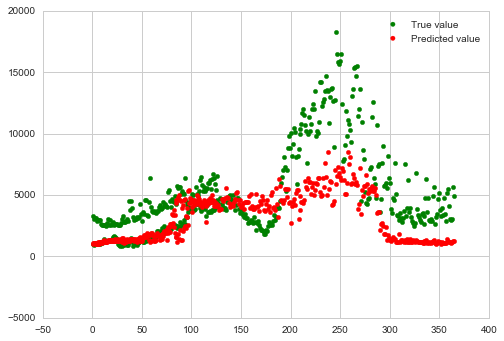

In [4]:
Y_pred = r.predict(r.random_forests(), X_train, Y_train, X_test, Y_test)
r.visualize_preds(df, Y_test, Y_pred, test_years=test_years)

R2-score:  0.120279051389


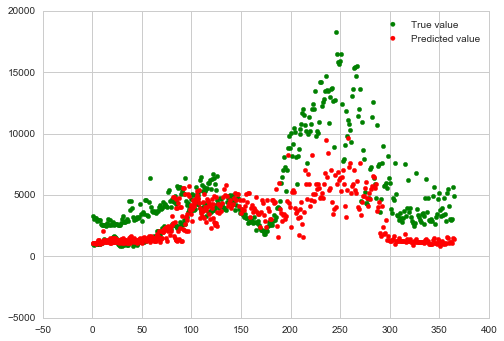

In [5]:
Y_pred = r.predict(r.xgb_trees(), X_train, Y_train, X_test, Y_test)
r.visualize_preds(df, Y_test, Y_pred, test_years=test_years)

R2-score:  -0.508869765219


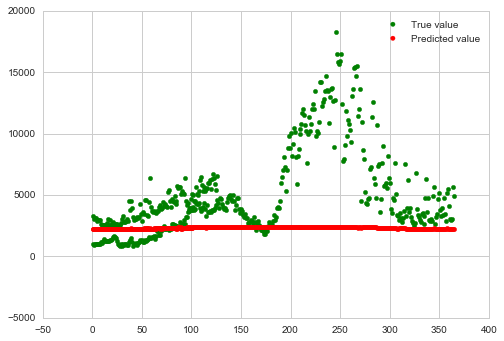

In [6]:
Y_pred = r.predict(r.svm(), X_train, Y_train, X_test, Y_test)
r.visualize_preds(df, Y_test, Y_pred, test_years=test_years)

Step #1, avg. loss: 19061286.00000
Step #501, epoch #125, avg. loss: 13432889.00000
Step #1001, epoch #250, avg. loss: 8351674.00000
Step #1501, epoch #375, avg. loss: 6477432.50000
Step #2001, epoch #500, avg. loss: 5478191.50000
Step #2501, epoch #625, avg. loss: 4767918.00000
Step #3001, epoch #750, avg. loss: 4208191.50000
Step #3501, epoch #875, avg. loss: 3754078.75000
Step #4001, epoch #1000, avg. loss: 3437382.25000
Step #4501, epoch #1125, avg. loss: 3257696.25000
R2-score:  -0.136932546505


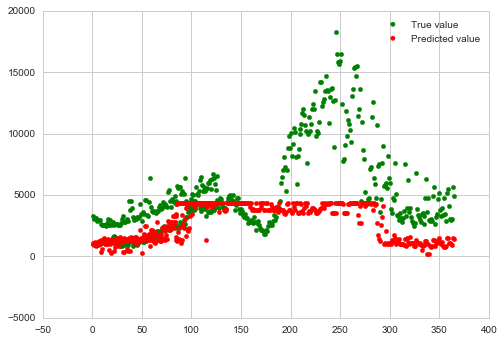

In [7]:
Y_pred = r.predict(r.dnn(), X_train, Y_train, X_test, Y_test)
r.visualize_preds(df, Y_test, Y_pred, test_years=test_years)